<a href="https://colab.research.google.com/github/juliannadesalle/ECGR-5106-Real-Time-Machine-Learning/blob/main/Homework_1_Problem_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [893]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
torch.set_printoptions(edgeitems=2, precision=2, linewidth=75)
import csv
#Get Housing details 
housing = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Colab Files - Load/Homework 1 P3/Housing.csv'))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [894]:
#Get the parameters we want to look at within the data set
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
Newtrain = housing[num_vars]
Newtrain.head()

,area,bedrooms,bathrooms,stories,parking,price
0,7420,4,2,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,3,2,2,2,12250000
3,7500,4,2,2,3,12215000
4,7420,4,1,2,2,11410000


In [895]:
%matplotlib inline
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, linewidth=75)
#define each of the tensors associated with the different specifications of the houses
t_c = torch.tensor([Newtrain['price']])
t_ua = torch.tensor([Newtrain['area']])
t_uan = 0.1 * t_ua
t_ubd = torch.tensor([Newtrain['bedrooms']])
t_ubdn = 0.1 * t_ubd
t_ubt = torch.tensor([Newtrain['bathrooms']])
t_ubtn = 0.1 * t_ubt
t_us = torch.tensor([Newtrain['stories']])
t_usn = 0.1 * t_us
t_up = torch.tensor([Newtrain['parking']])
t_upn = 0.1 * t_up

#define the model used to train the network
def model(t_ua, W5, W4, t_ubd, W3, t_ubt, W2, t_us, W1, t_up,  b):
    return W5*t_ua + W4*t_ubd + W3*t_ubt + W2*t_us + W1*t_up + b

#define the loss funciton using absolute
def loss_fn(t_p, t_c):
    squared_diffs = abs(t_p - t_c)
    return squared_diffs.mean()

W5 = torch.ones(())
W4 = torch.ones(())
W3 = torch.ones(())
W2 = torch.ones(())
W1 = torch.ones(())
b = torch.zeros(())

t_p = model(t_ua, W5, W4, t_ubd, W3, t_ubt, W2, t_us, W1, t_up,  b)
t_p

tensor([[ 7431.,  8975.,  9969.,  7511.,  7429.,  7509.,  8593., 16210.,
          8109.,  5760., 13208.,  6011.,  6559.,  3510.,  7807.,  6009.,
          6609.,  8511.,  4609.,  6428.,  4328.,  7163.,  8056.,  4568.,
          8809.,  6550.,  6009.,  8881.,  7961.,  5509.,  7486.,  7010.,
          4889.,  5969.,  6849.,  7011.,  7491.,  9012.,  6010.,  6011.,
          6556.,  6369.,  6491.,  6012.,  6011.,  6008.,  6010.,  6611.,
          4308.,  7446.,  7450.,  6334.,  6011.,  5161.,  6008.,  6007.,
         11448.,  9011.,  7691.,  6010.,  6008.,  8885.,  6249.,  6371.,
         11181.,  8888., 13205.,  7708.,  6006., 12100.,  4007.,  6010.,
          5028.,  6608.,  4047.,  4268.,  6428.,  6508.,  5707.,  6008.,
          6007.,  4008., 10507.,  6009.,  3768.,  8258.,  6677.,  3967.,
          7417.,  8592.,  5006.,  6756.,  4809.,  7209.,  6011.,  4110.,
          9006.,  6406.,  6608.,  6008.,  6606.,  5508.,  5510.,  6358.,
          5508.,  4508.,  5457.,  6427.,  3249.,  6

In [896]:
#calculate loss
loss = loss_fn(t_p, t_c)
loss

tensor(4761572.50)

In [897]:
x = torch.ones(())
y = torch.ones(3,1)
z = torch.ones(1,3)
a = torch.ones(3, 1, 1)
print(f"shapes: x: {x.shape}, y: {y.shape}")
print(f"        z: {z.shape}, a: {a.shape}")
print("x * y:", (x * y).shape)
print("y * z:", (y * z).shape)
print("y * z * a:", (y * z * a).shape)

shapes: x: torch.Size([]), y: torch.Size([3, 1])
        z: torch.Size([1, 3]), a: torch.Size([3, 1, 1])
x * y: torch.Size([3, 1])
y * z: torch.Size([3, 3])
y * z * a: torch.Size([3, 3, 3])


In [898]:
delta = 0.1
#calculate the value for the loss rate of change for w
loss_rate_of_change_w = \
    (loss_fn(model(t_ua, W5 + delta, W4 + delta, t_ubd, W3 + delta, t_ubt, W2 + delta, t_us, W1 + delta, t_up,  b), t_c) - 
     loss_fn(model(t_ua, W5 - delta, W4 - delta, t_ubd, W3 - delta, t_ubt, W2 - delta, t_us, W1 - delta, t_up,  b), t_c)) / (2.0 * delta)

In [899]:
#define the learning rate for the model
learning_rate = 1e-800000

#define the weights 
W1 = W1 - learning_rate * loss_rate_of_change_w
W2 = W2 - learning_rate * loss_rate_of_change_w
W3 = W3 - learning_rate * loss_rate_of_change_w
W4 = W4 - learning_rate * loss_rate_of_change_w
W5 = W5 - learning_rate * loss_rate_of_change_w
loss_rate_of_change_b = \
    (loss_fn(model(t_ua, W5, W4, t_ubd, W3, t_ubt, W2, t_us, W1, t_up, b + delta), t_c) - 
     loss_fn(model(t_ua, W5, W4, t_ubd, W3, t_ubt, W2, t_us, W1, t_up, b - delta), t_c)) / (2.0 * delta)

b = b - learning_rate * loss_rate_of_change_b
def loss_fn(t_p, t_c):
    squared_diffs = abs(t_p - t_c)
    return squared_diffs.mean()
#Use auto gradient to calculate gradient
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

loss = loss_fn(model(t_ua, t_ubd, t_ubt, t_us, t_up, *params), t_c)
loss.backward()

params.grad


if params.grad is not None:
    params.grad.zero_()

def training_loop(n_epochs, learning_rate, params, t_ua, t_ubd, t_ubt, t_us, t_up, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:  # <1>
            params.grad.zero_()
        
        t_p = model(t_ua, t_ubd, t_ubt, t_us, t_up, *params) 
        loss = loss_fn(t_p, t_c)
       
        loss.backward()
        
        with torch.no_grad():  # <2>
            params -= learning_rate * params.grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params
params = training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-800000, 
    params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True), # <1> 
    t_ua = t_uan,
    t_ubd = t_ubdn,
    t_ubt = t_ubtn,
    t_us = t_usn,
    t_up = t_upn, # <2> 
    t_c = t_c)

Epoch 500, Loss 4766572.500000
Epoch 1000, Loss 4766572.500000
Epoch 1500, Loss 4766572.500000
Epoch 2000, Loss 4766572.500000
Epoch 2500, Loss 4766572.500000
Epoch 3000, Loss 4766572.500000
Epoch 3500, Loss 4766572.500000
Epoch 4000, Loss 4766572.500000
Epoch 4500, Loss 4766572.500000
Epoch 5000, Loss 4766572.500000


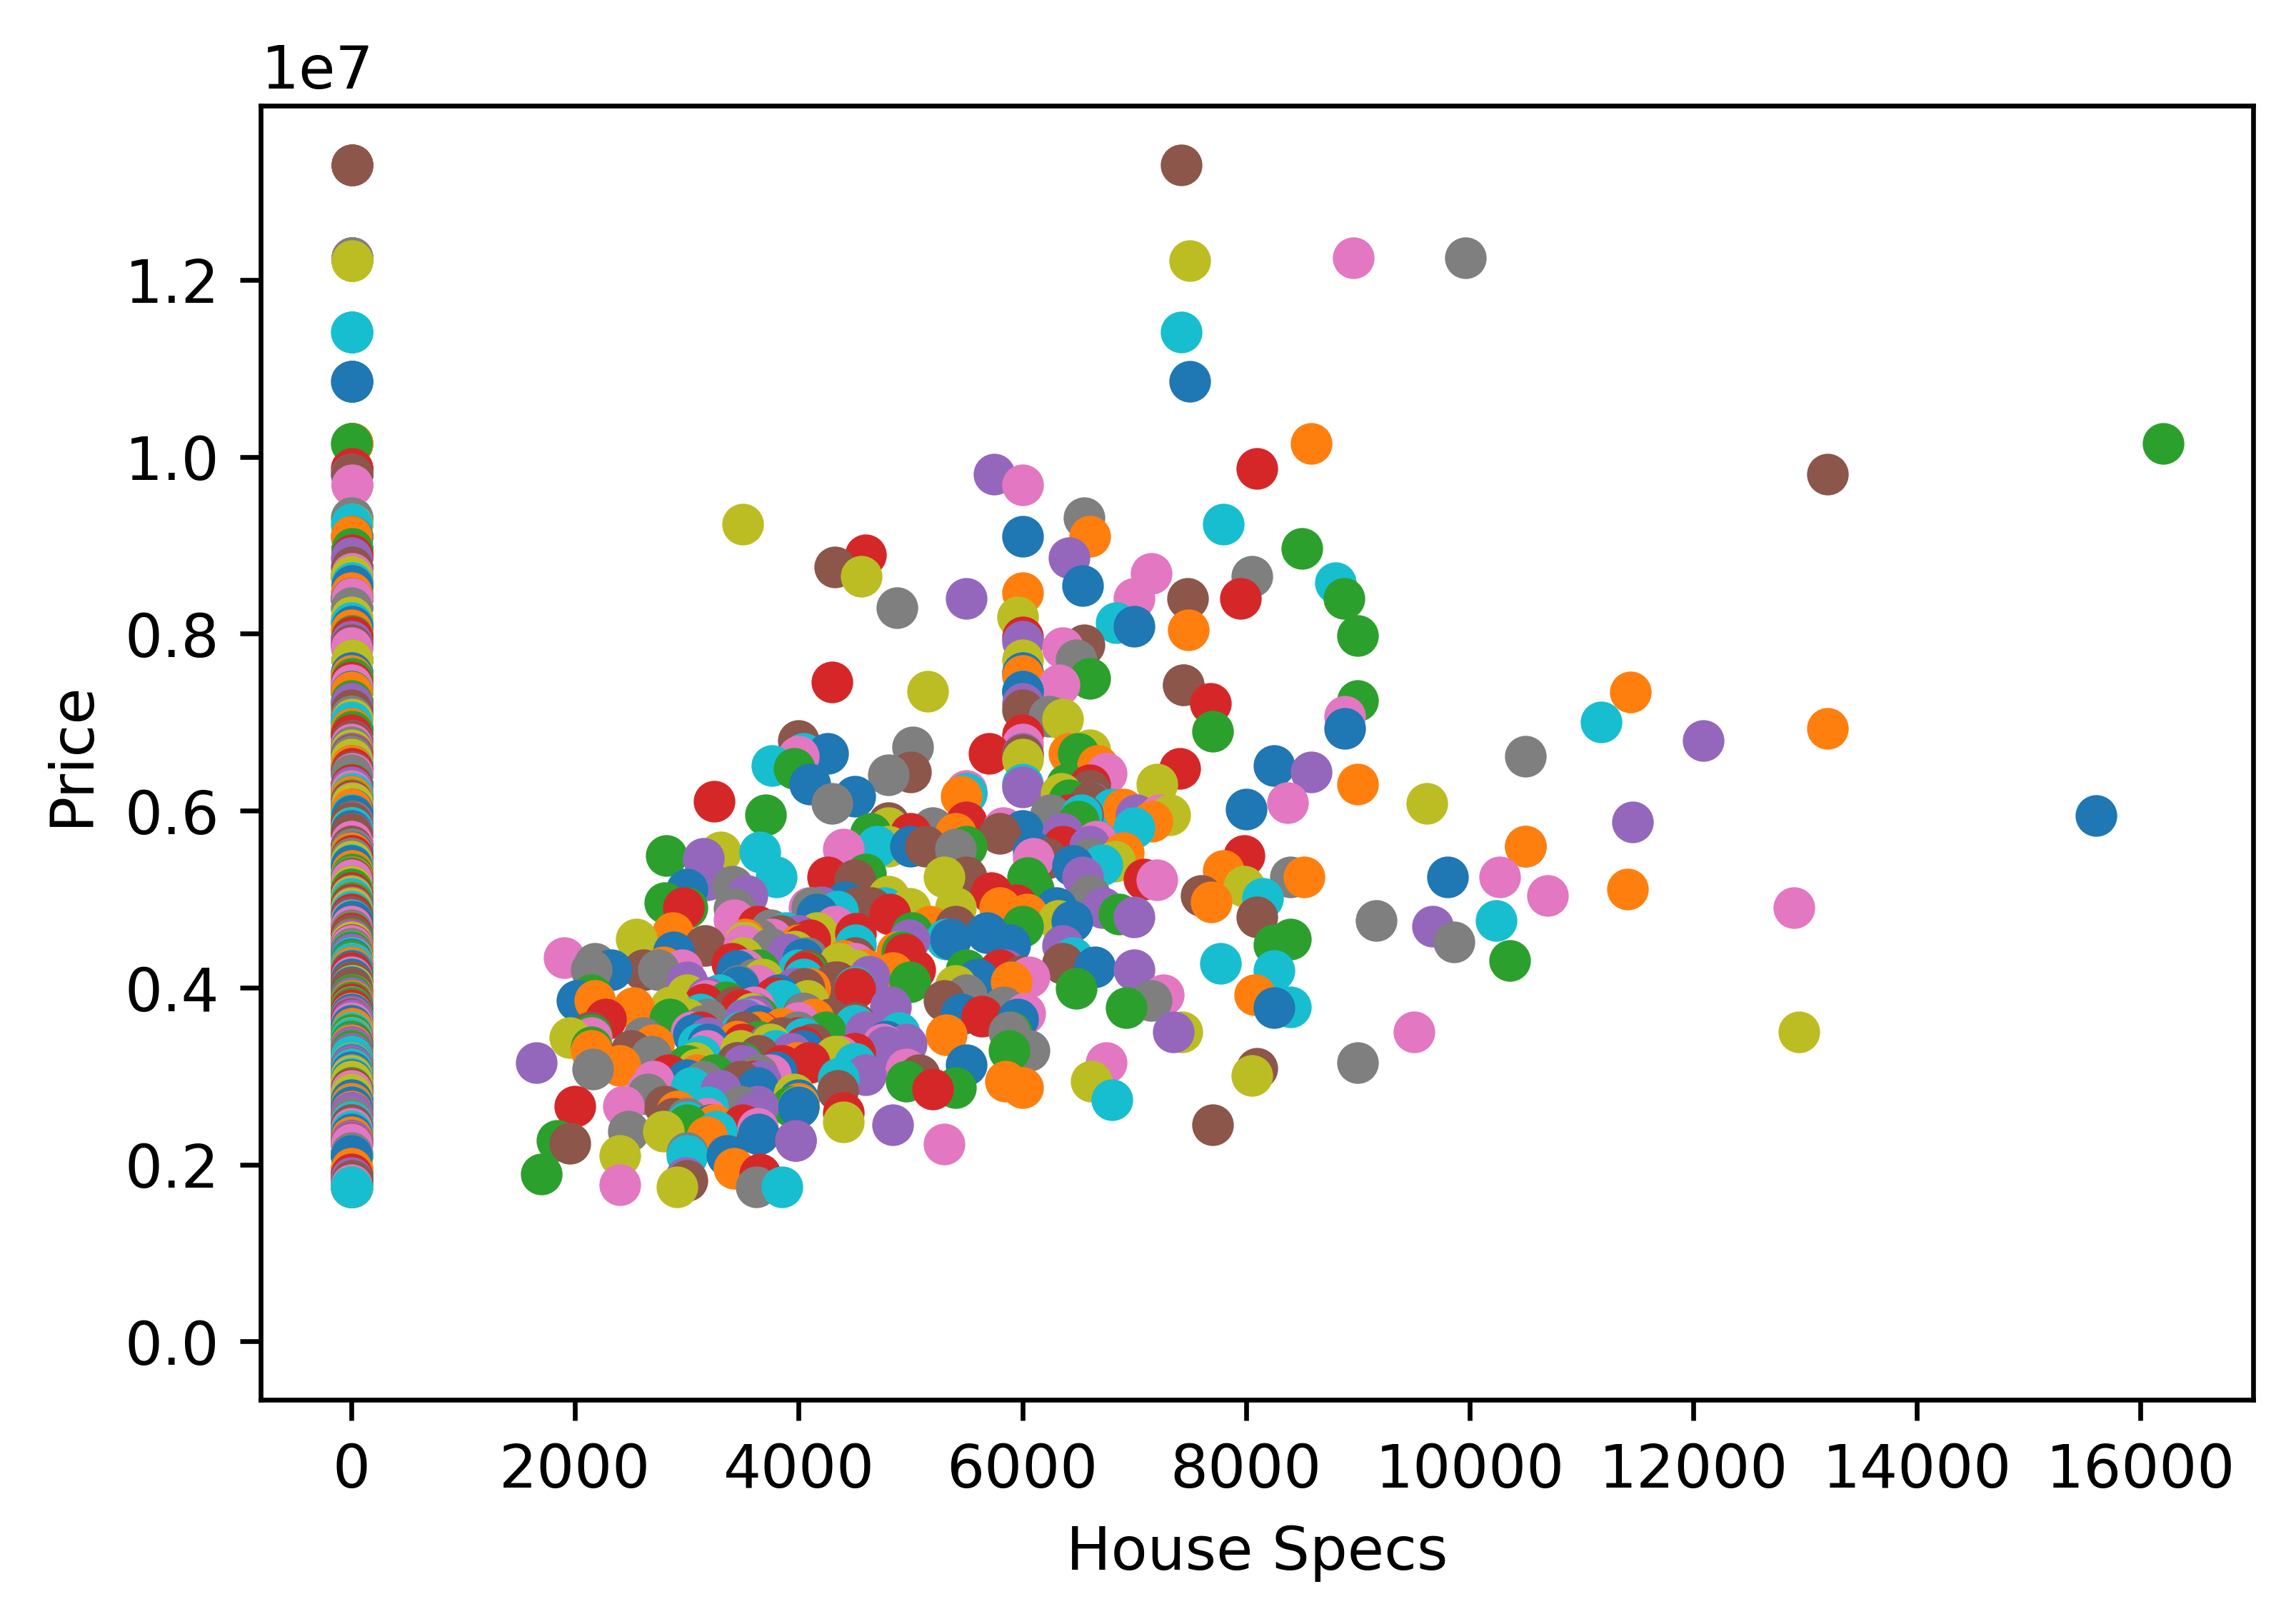

In [900]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(t_ua, t_ubd, t_ubt, t_us, t_up, *params)  # <1>
#print each specification vs. price on the chart
fig = plt.figure(dpi=600)
plt.xlabel("House Specs")
plt.ylabel("Price")
plt.plot(t_ua.numpy(), t_p.detach().numpy()) # <2>
plt.plot(t_ua.numpy(), t_c.numpy(), 'o')

plt.plot(t_ubd.numpy(), t_p.detach().numpy()) # <2>
plt.plot(t_ubd.numpy(), t_c.numpy(), 'o')

plt.plot(t_ubt.numpy(), t_p.detach().numpy()) # <2>
plt.plot(t_ubt.numpy(), t_c.numpy(), 'o')

plt.plot(t_us.numpy(), t_p.detach().numpy()) # <2>
plt.plot(t_us.numpy(), t_c.numpy(), 'o')

plt.plot(t_up.numpy(), t_p.detach().numpy()) # <2>
plt.plot(t_up.numpy(), t_c.numpy(), 'o')

plt.savefig("temp_unknown_plot.png", format="png")  # bookskip, *params)  # <1>
